In [17]:
# PERFIL PAÍS

In [13]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import folium
import numpy as np

In [ ]:
## GENERACIÓN ENEGÉTICA

In [100]:
La generación de energía eléctrica engloba al conjunto de procesos distintos a través de los cuales puede producirse
electricidad, o lo que es lo mismo, transformar otras formas de energía disponibles en la naturaleza (energía química,
cinética, térmica, lumínica, nuclear, etc.) en energía eléctrica aprovechable.

In [285]:
df_gen_vs_con = pd.read_csv('../datasets/gen_vs_con (2).csv')

df_gen_vs_con['Consumo per capita kWh']= df_gen_vs_con['Consumo per capita kWh'].apply(lambda x: x.replace('.','').replace(',','.'))
#df_gen_vs_con['Consumo per capita kWh'] = df_gen_vs_con['Consumo per capita kWh'].replace('.','').replace(',','.')
df_gen_vs_con['Consumo per capita kWh']= pd.to_numeric(df_gen_vs_con['Consumo per capita kWh'], errors='coerce')
df_gen_vs_con
#generacionxcentral.astype({"TERMICA": int,


,Fecha,Generación GWh,Consumo GWh,Consumo per capita kWh
0,2020,137.79,121.76,2683.4
1,2019,132.26,122.09,2716.8
2,2018,139.21,125.09,2811.4
3,2017,138.01,125.49,2849.1
4,2016,139.08,128.17,2940.2
5,2015,137.56,128.65,2982.8
6,2014,131.37,123.43,2892.6
7,2013,132.16,117.68,2788.4
8,2012,128.54,117.71,2820.6
9,2011,122.62,113.59,2752.9


In [14]:
fig = px.line(df_gen_vs_con, x='Fecha', y='Generación GWh', title='Generación Energética Historica Argentina')
fig.show()

In [20]:
##FUENTES DE GENERACIÓN

In [ ]:
Energía hidroeléctrica: a través de centrales hidroeléctricas, se utiliza la potencio del movimiento del agua para 
generar energía.
Energía termoeléctrica: el sistema funciona calentando el agua con combustibles fósiles, lo que produce vapor, 
que es transportado por tuberías hasta las turbinas, haciéndolas girar. Las turbinas están conectadas a 
generadores que crean un campo electromagnético interno, formando energía eléctrica.
Energía eólica: A través de parques eólicos se aprovecha el viento, transformándolo en energía. Funcionan a 
través de turbinas, que se parecen mucho a un molinete, que se mueven a causa del viento.
Energía nuclear: Las plantas nucleares utilizan elementos radiactivos, como el uranio, para generar energía. 
En este sistema, el núcleo del átomo de uranio se desintegra, liberando una gran cantidad de calor (energía).
Energía solar: es la producida por la luz –energía fotovoltaica- o el calor del sol –termosolar- para la 
generación de electricidad o la producción de calor. Se obtiene por medio de paneles y espejos.

In [154]:
centrales = pd.read_csv('../datasets/cant_centr_prov_pobl_consumo.csv', sep=';')
centrales.head()
centrales.fillna(0)

,Provincia,Nro de centrales,Población 2020,Consumo total por población provincia GW,TERMICA,EOLICA,HIDRAULICA,NUCLEAR,RENOVABLES
0,Buenos Aires,50,17541141,47062881303,39.0,6.0,0.0,2.0,3
1,Catamarca,10,415438,1114620154,10.0,0.0,0.0,0.0,0
2,Chaco,9,1204541,3231783503,9.0,0.0,0.0,0.0,0
3,Chubut,58,618994,1660760902,49.0,8.0,1.0,0.0,0
4,Ciudad Autónoma de Buenos Aires,5,3075646,8251958218,5.0,0.0,0.0,0.0,0
5,Córdoba,17,3760450,10089287350,13.0,0.0,2.0,0.0,2
6,Corrientes,28,1120801,3007109083,27.0,0.0,1.0,0.0,0
7,Entre Ríos,4,1385961,3718533363,3.0,0.0,1.0,0.0,0
8,Formosa,34,605193,1623732819,34.0,0.0,0.0,0.0,0
9,Jujuy,34,770881,2068273723,21.0,0.0,0.0,0.0,13


In [214]:
generacionxcentral = centrales[['TERMICA', 'EOLICA', 'HIDRAULICA', 'NUCLEAR', 'RENOVABLES']]
generacionxcentral = generacionxcentral.fillna(0)
generacionxcentral = generacionxcentral.astype({"TERMICA": int, "EOLICA": int, "HIDRAULICA": int, "NUCLEAR": int, "RENOVABLES": int})
porcentajextipo = generacionxcentral.iloc[-1,:]/generacionxcentral.iloc[-1,:].sum()
porcentajextipo.index

Index(['TERMICA', 'EOLICA', 'HIDRAULICA', 'NUCLEAR', 'RENOVABLES'], dtype='object')

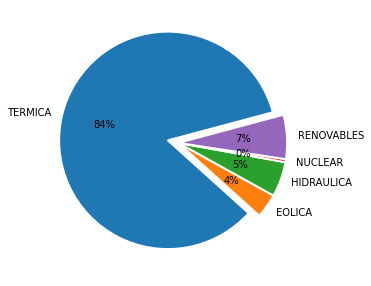

In [247]:


plt.pie(porcentajextipo.values,
        labels=porcentajextipo.index,
        labeldistance=1.1,
        autopct='%1.0f%%',
        startangle=15,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white'},
        explode= (0.1,0,0,0,0));


In [16]:
## CONSUMO ENEGÉTICO

In [ ]:
El consumo energético es el gasto total de la energía, y normalmente incluye más de una fuente energética.

In [15]:
fig2 = px.line(df_gen_vs_con, x='Fecha', y='Consumo GWh', title='Consumo Energético Historica Argentina')
fig2.show()

In [ ]:
#GENERACIÓN Y CONSUMO SEGÚN FUENTE DE PRODUCCIÓN: IMPORTADA/ EXPORTADA

In [102]:
imp_exp = pd.read_csv('../datasets/importaciones-y-exportaciones.csv')
imp_exp.head()

,id,anio,mes,pais,tipo,energia_mwh,fecha_proceso,lote_id_log,indice_tiempo
0,5018,2017,1,Brasil,Exportación,71.046,2020-05-05 11:07:40.828862,67,2017-01
1,5019,2017,1,Chile,Exportación,0.000,2020-05-05 11:07:40.828862,67,2017-01
2,5020,2017,1,Paraguay,Exportación,0.000,2020-05-05 11:07:40.828862,67,2017-01
3,5021,2017,1,Uruguay,Exportación,0.000,2020-05-05 11:07:40.828862,67,2017-01
4,5022,2017,1,Brasil,Importación,108794.052,2020-05-05 11:07:40.828862,67,2017-01


In [178]:
imp_exp_fin = imp_exp[['pais', 'tipo', "energia_mwh"]]
imp_exp_fin

,pais,tipo,energia_mwh
0,Brasil,Exportación,71.046
1,Chile,Exportación,0.000
2,Paraguay,Exportación,0.000
3,Uruguay,Exportación,0.000
4,Brasil,Importación,108794.052
...,...,...,...
299,Uruguay,Exportación,29925.000
300,Brasil,Importación,54.288
301,Chile,Importación,0.000
302,Paraguay,Importación,11365.842


In [249]:
imp_exp_fin = imp_exp_fin.astype({"energia_mwh": int})
eximxpais = imp_exp_fin.groupby(['pais', 'tipo']).sum('energia_mwh')
eximxpais.unstack()

energia_mwh            
tipo     Exportación Importación
pais                            
Brasil        597461      365874
Chile            123       35925
Paraguay          25      247629
Uruguay        55543     3238739

In [ ]:
#EMISIONES CO2 A PARTIR DE LA GENERACIÓN DE ENRGÍA

In [96]:
df_emis_arg = pd.read_csv('../datasets/Emisiones_Argentina.csv',sep = ';')
df_emis_arg_fin = df_emis_arg[['FECHA', 'de combustible líquido', 'de combustible gaseoso', 'de combustibles sólidos']]
df_emis_arg_fin.dropna(inplace = True)
df_emis_arg_fin.head()

/Users/mandyespinosa/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,FECHA,de combustible líquido,de combustible gaseoso,de combustibles sólidos
0,1960,84.0,5.0,8.0
1,1961,82.0,8.0,7.0
2,1962,84.0,10.0,4.0
3,1963,81.0,12.0,5.0
4,1964,81.0,12.0,5.0


In [98]:
x=df_emis_arg_fin['FECHA']
y1=df_emis_arg_fin['de combustible líquido']
y2=df_emis_arg_fin['de combustible gaseoso']
y3=df_emis_arg_fin['de combustibles sólidos']
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines',
                    name='líquido'))
fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines',
                    name='gaseoso'))
fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines',
                    name='solido'))

fig.update_layout(title='Emisones de CO2 por consumo de combustible liquido/gaseoso/solido en la generación de energía',
                   xaxis_title='Year',
                   yaxis_title='Emision en EN.ATM.CO2E.LF')


fig.show()

In [ ]:
## CONSUMO PERCAPITA

In [286]:
fig = px.line(df_gen_vs_con, x='Fecha', y='Consumo per capita kWh', title='Consumo Percapita Historica Argentina')
fig.show()